In [1]:
%bash

git clone https://github.com/GoogleCloudPlatform/training-data-analyst
rm -rf training-data-analyst/.git

Cloning into 'training-data-analyst'...


In [3]:
import google.datalab.bigquery as bq
import numpy as np
import seaborn as sns
import pandas as pd

In [10]:
query = """
SELECT 
  pickup_datetime,
  pickup_longitude, pickup_latitude, 
  dropoff_longitude, dropoff_latitude,
  passenger_count,
  trip_distance,
  tolls_amount,
  fare_amount,
  total_amount
FROM
  `nyc-tlc.yellow.trips`
WHERE
  MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), EVERY_N) = 1
"""

In [18]:
every_n = 100000
trips = bq.Query(query.replace('EVERY_N', str(every_n))).execute().result().to_dataframe()

In [20]:
print("The number of records %d" % len(trips))
result[:10]

The number of records 10789


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2009-09-04 21:49:30,-73.991085,40.755503,-73.991185,40.755543,1,0.00,0.0,2.5,2.5
1,2009-08-31 13:27:07,-73.979360,40.735598,-73.971661,40.758827,1,1.80,0.0,2.5,2.5
2,2009-07-04 08:36:00,-73.992533,40.756207,-73.992555,40.756205,1,0.00,0.0,2.5,2.5
3,2009-08-20 23:04:58,-73.980657,40.765322,-73.962737,40.769690,1,2.50,0.0,2.5,2.5
4,2009-09-28 17:47:22,-73.984128,40.780583,-73.984141,40.780562,1,0.00,0.0,2.5,2.5
5,2009-05-27 20:37:00,-73.967982,40.762537,-73.967553,40.761778,5,0.07,0.0,2.5,3.0
6,2009-09-30 22:58:14,-73.988954,40.758612,-73.952118,40.776227,2,4.70,0.0,2.5,3.0
7,2011-06-19 12:39:56,-73.994080,40.751073,-73.994097,40.751091,1,0.00,0.0,2.5,3.0
8,2013-12-06 14:55:00,-73.988727,40.773987,-73.988755,40.774037,5,0.00,0.0,2.5,3.0
9,2014-05-17 15:15:00,-73.990825,40.750897,-73.990795,40.750872,6,0.00,0.0,2.5,3.0


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


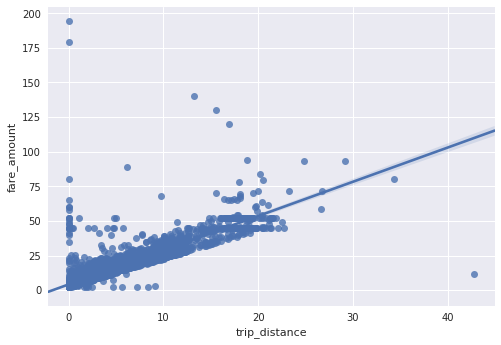

In [21]:
sns.regplot(x = 'trip_distance', y = 'fare_amount', data = trips)

In [24]:
toll_rides = trips[trips['tolls_amount'] > 0]
toll_rides = toll_rides[toll_rides['pickup_datetime'] == '2014-05-20 23:09:00']
toll_rides[:10]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
2842,2014-05-20 23:09:00,-73.975610,40.751660,-73.953920,40.743240,1,2.22,5.33,8.5,14.83
4055,2014-05-20 23:09:00,-73.987960,40.754062,-73.956627,40.745962,2,3.11,5.33,11.5,21.30
5045,2014-05-20 23:09:00,0.000000,0.000000,0.000000,0.000000,1,6.38,5.33,20.0,26.33
5145,2014-05-20 23:09:00,-73.873527,40.773922,-73.944947,40.828902,5,8.35,5.33,25.0,36.33
5249,2014-05-20 23:09:00,-74.005625,40.736770,-73.919840,40.877687,1,14.33,2.44,42.0,54.43
5301,2014-05-20 23:09:00,-73.783898,40.648660,-73.981845,40.762872,6,18.18,5.33,52.0,69.30
5402,2014-05-20 23:09:00,-73.781987,40.644755,-73.921672,40.828412,1,19.08,5.33,50.5,56.83
5854,2014-05-20 23:09:00,-73.873210,40.774042,-73.978013,40.755800,5,10.45,5.33,30.5,36.83
5855,2014-05-20 23:09:00,-73.870160,40.760742,-73.980912,40.788492,4,10.37,5.33,30.5,45.91
5861,2014-05-20 23:09:00,-73.874445,40.774037,-73.982382,40.784930,1,9.97,5.33,30.5,44.10


In [25]:
trips.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,-72.577466,39.988518,-72.577056,39.991694,1.648716,2.837068,0.228359,11.165192,13.280564
std,10.071200,5.523964,10.068592,5.510504,1.282589,3.319036,1.144977,9.444876,11.267704
min,-75.336579,0.000000,-75.381754,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000
25%,-73.992172,40.735837,-73.991581,40.734267,1.000000,1.010000,0.000000,6.000000,7.200000
50%,-73.981871,40.753200,-73.980401,40.752872,1.000000,1.750000,0.000000,8.500000,10.000000
75%,-73.967330,40.767309,-73.964102,40.767484,2.000000,3.110000,0.000000,12.500000,14.600000
max,0.000000,41.366138,0.000000,41.366138,6.000000,42.800000,16.000000,194.750000,204.750000


In [36]:
def sample_between(a, b):
  query = """
    SELECT 
      (tolls_amount + fare_amount) AS fare_amount,
      pickup_longitude,
      pickup_latitude,
      dropoff_longitude,
      dropoff_latitude,
      passenger_count
    FROM
      `nyc-tlc.yellow.trips`
    WHERE
      trip_distance > 0 AND
      fare_amount >= 2.5 AND
      pickup_longitude > -78 AND
      pickup_longitude < -70 AND
      pickup_latitude > 37 AND
      pickup_latitude < 45 AND
      dropoff_longitude > -78 AND
      dropoff_longitude < -70 AND
      dropoff_latitude > 37 AND
      dropoff_latitude < 45 AND
      passenger_count > 0
  """
  sample1 = "AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), EVERY_N) = 1"
  sample2 = "AND {0} >= {1} \n AND {0} < {2}".format("MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), EVERY_N * 100)", "EVERY_N * {}".format(a), "EVERY_N * {}".format(b))
  
  return "{} \n {} \n {}".format(query, sample1, sample2)
  

In [37]:
def create_query(phase, EVERY_N):
  if phase == 'training':
    query = sample_between(0, 70)
  elif phase == 'validation':
    query = sample_between(70, 85)
  elif phase == 'test':
    query = sample_between(85, 100)
  else:
    raise ValueError('Phase must be one of training, validation or test')
    
  return query.replace('EVERY_N', str(EVERY_N))

In [38]:
print(create_query('training', 100000))


    SELECT 
      (tolls_amount + fare_amount) AS fare_amount,
      pickup_longitude,
      pickup_latitude,
      dropoff_longitude,
      dropoff_latitude,
      passenger_count
    FROM
      `nyc-tlc.yellow.trips`
    WHERE
      trip_distance > 0 AND
      fare_amount >= 2.5 AND
      pickup_longitude > -78 AND
      pickup_longitude < -70 AND
      pickup_latitude > 37 AND
      pickup_latitude < 45 AND
      dropoff_longitude > -78 AND
      dropoff_longitude < -70 AND
      dropoff_latitude > 37 AND
      dropoff_latitude < 45 AND
      passenger_count > 0
   
 AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 100000) = 1 
 AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 100000 * 100) >= 100000 * 0 
 AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 100000 * 100) < 100000 * 70


In [39]:
def to_csv(df, filename):
  outdf = df.copy(deep = False)
  outdf.loc[:, 'key'] = np.arange(0, len(outdf)) # rownumber as key
  # Reorder columns so that target is first column
  cols = outdf.columns.tolist()
  cols.remove('fare_amount')
  cols.insert(0, 'fare_amount')
  print cols  # new order of columns
  outdf = outdf[cols]
  outdf.to_csv(filename, header = False, index_label = False, index = False)
  print "Wrote {} to {}".format(len(outdf), filename)

In [40]:
for phase in ['training', 'validation', 'test']:
  query = create_query(phase, 100000)
  df = bq.Query(query).execute().result().to_dataframe()
  to_csv(df, "taxi-{}.csv".format(phase))

['fare_amount', u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude', u'passenger_count', 'key']
Wrote 7645 to taxi-training.csv
['fare_amount', u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude', u'passenger_count', 'key']
Wrote 1814 to taxi-validation.csv
['fare_amount', u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude', u'passenger_count', 'key']
Wrote 1017 to taxi-test.csv


In [42]:
ls *.csv

taxi-test.csv  taxi-training.csv  taxi-validation.csv


In [44]:
%bash
head taxi-training.csv

2.5,-73.987043,40.739564,-73.955514,40.684206,1,0
2.5,-73.980657,40.765322,-73.962737,40.76969,1,1
2.5,-74.000582,40.72078,-74.001115,40.720127,1,2
2.5,-73.959395,40.81438,-73.960735,40.814117,1,3
2.5,-74.002639,40.733425,-74.001557,40.732889,1,4
2.5,-73.948147,40.782915,-73.947772,40.782683,1,5
2.5,-73.789012,40.647892,-73.789115,40.64798,1,6
2.5,-73.99392,40.751139,-73.99392,40.751138,1,7
2.5,-73.98158,40.766128,-73.98166,40.765591,1,8
2.5,-73.980335,40.744333,-73.980332,40.744335,1,9


In [46]:
def distance_between(lat1, lon1, lat2, lon2):
  # Haversine formula to compute distance "as the crow flies".  Taxis can't fly of course.
  dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) * np.sin(np.radians(lat2)) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(np.radians(lon2 - lon1)))) * 60 * 1.515 * 1.609344
  return dist

def estimate_distance(df):
  return distance_between(df['pickuplat'], df['pickuplon'], df['dropofflat'], df['dropofflon'])

def compute_rmse(actual, predicted):
  return np.sqrt(np.mean((actual - predicted)**2))

def print_rmse(df, rate, name):
  print "{1} RMSE = {0}".format(compute_rmse(df['fare_amount'], rate * estimate_distance(df)), name)

FEATURES = ['pickuplon','pickuplat','dropofflon','dropofflat','passengers']
TARGET = 'fare_amount'
columns = list([TARGET])
columns.extend(FEATURES) # in CSV, target is the first column, after the features
columns.append('key')
df_train = pd.read_csv('taxi-training.csv', header = None, names = columns)
df_valid = pd.read_csv('taxi-validation.csv', header = None, names = columns)
df_test = pd.read_csv('taxi-test.csv', header = None, names = columns)
rate = df_train['fare_amount'].mean() / estimate_distance(df_train).mean()
print "Rate = ${0}/km".format(rate)
print_rmse(df_train, rate, 'Train')
print_rmse(df_valid, rate, 'Valid') 
print_rmse(df_test, rate, 'Test') 

Rate = $2.61647176311/km
Train RMSE = 7.45944991489
Valid RMSE = 9.35408260824
Test RMSE = 5.44470807953


/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()
